In [145]:
import numpy as np
import heapq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [146]:
#Let's create a 10x10 numpy array filled with 1's and 0's as below.  
#The 0's will be positions that we're allowed to travel on, and the 1's will be obstacles.

grid = np.array([
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [147]:
# start point and goal
start = (0,0)
goal = (9,9)

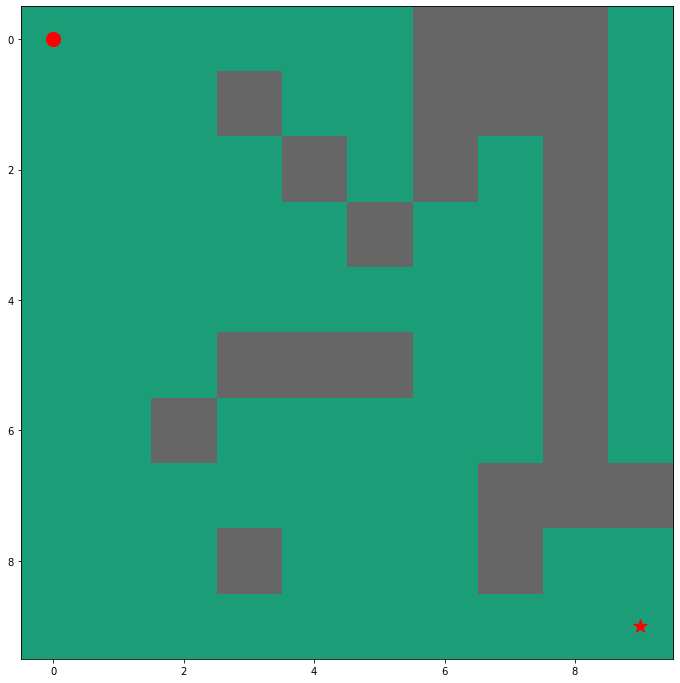

In [148]:
# plot map and path
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[0],start[0], marker = "o", color = "red", s = 200)
ax.scatter(goal[1],goal[1], marker = "*", color = "red", s = 200)
plt.show()

In [149]:
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [150]:
#Main Path Finding Function:

def astar(array, start, goal):
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        close_set.add(current)       
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue         
            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

In [151]:
route = astar(grid, start, goal)

In [152]:
print(route)

[(9, 9), (9, 8), (9, 7), (8, 6), (7, 6), (6, 6), (5, 6), (4, 5), (3, 4), (2, 3), (1, 2), (1, 1)]


In [153]:
#Add start position:
route = route + [start]

#Reverse the order:
route = route[::-1]

#Now if we print this list, we get what we want...
print(route)

[(0, 0), (1, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 6), (7, 6), (8, 6), (9, 7), (9, 8), (9, 9)]


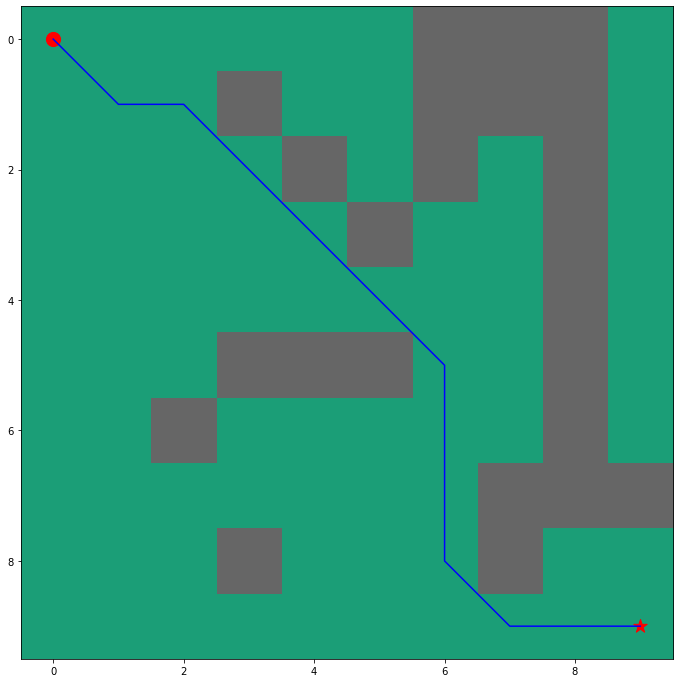

In [154]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#extract x and y coordinates from route list
x_coords = []
y_coords = []
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "o", color = "red", s = 200)
ax.scatter(goal[1],goal[1], marker = "*", color = "red", s = 200)
ax.plot(y_coords,x_coords, color = "blue")
plt.show()